In [ ]:
# Colab
from google.colab import files
import io

# Data manipulation
import json 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from bokeh.io import output_file, show, output_notebook
from bokeh.models import GeoJSONDataSource,LinearColorMapper,HoverTool,CustomJS,Dropdown,RadioButtonGroup
from bokeh.plotting import figure
from bokeh.palettes import Viridis6,Turbo256, Category20
from bokeh.layouts import column, row

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
uploaded_csv = files.upload()
df = pd.read_csv(io.BytesIO(uploaded_csv['Final_data_map_1.csv']))
df = df.apply(pd.to_numeric, errors='raise')
df.describe().T

Saving Final_data_map_1.csv to Final_data_map_1 (2).csv


,count,mean,std,min,25%,50%,75%,max
I.D,3459.0,1729.000000,998.671618,0.00,864.500000,1729.000000,2593.500000,3458.000
x-coord,3459.0,13246.337677,4196.188339,4353.04,10500.950000,13185.720000,16831.377500,20406.675
y-coord,3459.0,8877.298966,1633.144516,4689.62,7422.175000,9268.175000,10212.772500,11574.770
Attraction points_Proximity,3459.0,0.598964,0.202658,0.00,0.471264,0.609195,0.758621,1.000
Attraction points_Availability,3459.0,0.609990,0.230898,0.00,0.444444,0.666667,0.777778,1.000
Performing art_Proximity,3459.0,0.756700,0.179085,0.00,0.673913,0.804348,0.880435,1.000
Performing art_Availability,3459.0,0.470429,0.341989,0.00,0.133333,0.393333,0.800000,1.000
Cinemas_Proximity,3459.0,0.657038,0.245610,0.00,0.495370,0.740741,0.842593,1.000
Cinemas_Availability,3459.0,0.432253,0.376642,0.00,0.000000,0.375000,0.750000,1.000
Cafes_Proximity,3459.0,0.858088,0.174618,0.00,0.818182,0.927273,0.963636,1.000


In [ ]:
# Finding correlation
corr = df.corr()
c1 = corr.abs().unstack()
list(c1.sort_values(ascending=False).items())[len(df.columns)::2][:5]

[(('Time_1', 'Time_0'), 0.9999199150618454),
 (('Time_4', 'Time_3'), 0.9980025531359097),
 (('I.D', 'y-coord'), 0.9838356914305063),
 (('Cinemas_Availability', 'Performing art_Availability'), 0.9511135151964336),
 (('Time_2', 'Time_3'), 0.9164072207381843)]

In [ ]:
# Extract coords from data
df_coords = df[['x-coord', 'y-coord']]

#df_data   = df.drop(['I.D','x-coord', 'y-coord','Attraction points_Availability','Performing art_Availability','Cinemas_Availability','Cafes_Availability','Restaurants_Availability'], axis=1)
df_data   = df.drop(['I.D','x-coord', 'y-coord','Time_0','Time_1','Time_2','Time_3','Time_4'], axis=1)
# Scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_data),
    columns=df_data.columns
)

In [ ]:
def map_clustering_results(coords, model):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['x-coord'].to_numpy()[labels == label]
        y = coords['y-coord'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_)

In [ ]:
km_model = KMeans(
    n_clusters = 3
)

In [ ]:
km_model.fit(scaled_df)

KMeans(n_clusters=6)

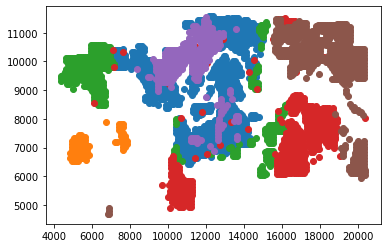

In [ ]:
map_clustering_results(df_coords, km_model)

In [ ]:
df_cluster = pd.DataFrame(km_model.labels_)

In [ ]:
df_cluster.to_csv('Time_5_Clustering.csv')
files.download('Time_5_Clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cluster0 = df.loc[df_cluster[0]==0]
df_cluster1 = df.loc[df_cluster[0]==1]
df_cluster2 = df.loc[df_cluster[0]==2]
df_cluster3 = df.loc[df_cluster[0]==3]
df_cluster4 = df.loc[df_cluster[0]==4]
df_cluster5 = df.loc[df_cluster[0]==5]
df_cluster6 = df.loc[df_cluster[0]==6]

In [ ]:
df_cluster5.describe().T

,count,mean,std,min,25%,50%,75%,max
I.D,667.0,1785.851574,677.305829,0.00,1507.500000,1885.000000,2261.500000,2914.000000
x-coord,667.0,11948.090712,1662.615232,8539.98,10947.125000,12543.530000,13210.315000,14601.075000
y-coord,667.0,8861.694033,1104.201432,6965.09,7879.175000,8916.145000,9566.310000,11574.770000
Attraction points_Proximity,667.0,3.501349,0.976779,0.90,2.600000,3.800000,4.350000,5.000000
Attraction points_Availability,667.0,7.458621,0.635012,6.00,7.000000,7.600000,8.000000,9.000000
Performing art_Proximity,667.0,1.523688,0.671699,0.10,1.000000,1.500000,2.100000,3.000000
Performing art_Availability,667.0,13.504348,1.131104,11.00,13.000000,14.000000,14.000000,15.000000
Cinemas_Proximity,667.0,1.935082,0.577193,0.10,1.600000,1.900000,2.300000,3.500000
Cinemas_Availability,667.0,6.890405,0.717665,5.50,6.000000,7.000000,7.000000,8.000000
Cafes_Proximity,667.0,0.247826,0.160069,0.00,0.100000,0.200000,0.300000,0.700000


In [ ]:
df_cluster4.describe().T

,count,mean,std,min,25%,50%,75%,max
I.D,264.0,1305.784091,466.155063,213.000,960.750000,1376.500000,1641.250000,2949.000000
x-coord,264.0,19411.416629,561.621954,17446.470,19028.085000,19428.615000,19838.985000,20360.765000
y-coord,264.0,10005.856420,598.496303,7233.975,9685.435000,10017.195000,10386.565000,11304.775000
Attraction points_Proximity,264.0,7.020076,0.580100,4.000,6.700000,7.000000,7.400000,8.700000
Attraction points_Availability,264.0,2.200000,0.511094,1.000,2.000000,2.000000,2.325000,4.000000
Performing art_Proximity,264.0,4.261742,0.644437,0.900,4.000000,4.300000,4.600000,6.000000
Performing art_Availability,264.0,1.674242,0.586622,0.000,1.500000,2.000000,2.000000,2.000000
Cinemas_Proximity,264.0,9.218561,0.799713,6.300,8.800000,9.350000,9.700000,10.800000
Cinemas_Availability,264.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
Cafes_Proximity,264.0,1.403409,0.620520,0.100,0.900000,1.300000,1.900000,2.900000
